In [1]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
path_to_xlsx = 'G:\\My Drive\\DataFiles\\Full_Image_List_6.5.24\\all_elements_with_part_type.xlsx'

In [3]:
all_elements_full_info = pd.read_excel(path_to_xlsx)

In [4]:
path_to_csv = 'G:\\My Drive\\DataFiles\\booksSacrobosco.csv'

In [5]:
all_books = pd.read_csv(path_to_csv)

C:\Users\nogas\AppData\Local\Temp\ipykernel_14160\1738547396.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eighth_sphere_motion['year_interval'] = pd.cut(eighth_sphere_motion['year'], bins=bins, labels=labels, right=True)


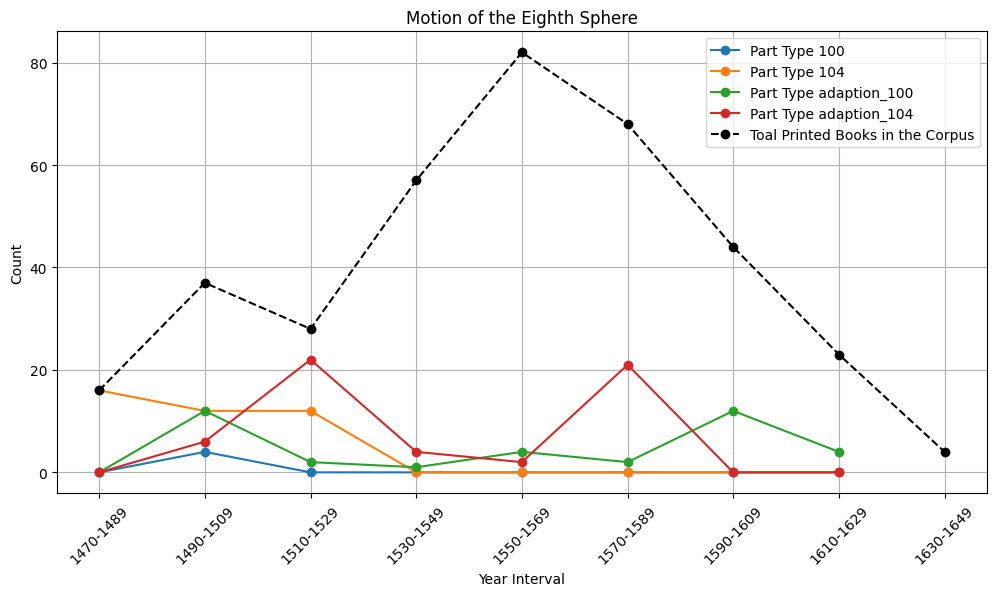

In [6]:
eighth_sphere_motion = all_elements_full_info[all_elements_full_info['keywords'].str.contains('CK_Motion of the Eighth Sphere')]

# Define the 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column 'year_interval' to hold the 20-year intervals in water_earth
eighth_sphere_motion['year_interval'] = pd.cut(eighth_sphere_motion['year'], bins=bins, labels=labels, right=True)

# Group by year_interval and part_type, and count unique images
grouped = eighth_sphere_motion.groupby(['year_interval', 'part_type'], observed=True)['images'].nunique().reset_index()

# Pivot the table for easier plotting
pivot_df = grouped.pivot(index='year_interval', columns='part_type', values='images').fillna(0)

# Create a new column 'year_interval' in all_books
all_books['year_interval'] = pd.cut(all_books['year_published_from'], bins=bins, labels=labels, right=True)

# Group by year_interval and count unique subjects
grouped_subjects = all_books.groupby('year_interval', observed=True)['subject'].nunique().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Plot unique images for each part_type
for part_type in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[part_type], marker='o', label=f'Part Type {part_type}')

# Plot unique subjects
plt.plot(grouped_subjects['year_interval'], grouped_subjects['subject'], marker='o', linestyle='--', color='black', label='Toal Printed Books in the Corpus')

plt.title('Motion of the Eighth Sphere')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [7]:
eighth_sphere_motion

,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,pagenum,bb,part_type,year_interval
144,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;CK_Motion of the ...,SIL_00652,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,89,"xywh=537,1124,1173,992",104,1490-1509
145,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;CK_Motion of the ...,SIL_01419,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,89,"xywh=2349,471,1151,1181",104,1490-1509
146,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;CK_Motion of the ...,SIL_02192,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,90,"xywh=2293,511,1192,1158",104,1490-1509
147,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;CK_Motion of the ...,SIL_00770,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,90,"xywh=419,139,1192,1099",104,1490-1509
178,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.5 Their movements;CK_Motion of the Eighth...,SIL_01374,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1494,1626,http://sphaera.mpiwg-berlin.mpg.de/id/item/b63...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,14,"xywh=684,667,850,873",100,1490-1509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De declinatione et latitudine;CK_Motion of...,SIL_01052,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1581,2258,http://sphaera.mpiwg-berlin.mpg.de/id/item/75a...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,164,"xywh=277,289,195,151",adaption_104,1570-1589
20221,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;Per_De declinatio...,SIL_01044,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1581,2258,http://sphaera.mpiwg-berlin.mpg.de/id/item/75a...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,165,"xywh=235,134,172,54",adaption_104,1570-1589
20222,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De declinatione et latitudine;CK_Motion of...,SIL_00010,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1581,2258,http://sphaera.mpiwg-berlin.mpg.de/id/item/75a...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,165,"xywh=253,337,192,148",adaption_104,1570-1589
20223,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Diagrams;Per_De declinatione et latitudine...,SIL_00209,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1581,2258,http://sphaera.mpiwg-berlin.mpg.de/id/item/75a...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,166,"xywh=87,198,154,123",adaption_104,1570-1589


In [13]:
# Select the column from which to get unique values
#column_name = 'cluster_name'
#unique_values = eighth_sphere_motion[column_name].unique()

# Create a new DataFrame from the unique values
#unique_df = pd.DataFrame(unique_values, columns=[column_name])

# Save the DataFrame to an Excel file
#excel_file_path = 'eighth_sphere_clusters.xlsx'
#unique_df.to_excel(excel_file_path, index=False)

In [14]:
path_to_xlsx1 = 'C:\\Users\\nogas\\Image_data\\eighth_sphere_clusters.xlsx'

In [15]:
visual_motion_eighth = pd.read_excel(path_to_xlsx1)

In [16]:
visual_motion_eighth

,cluster_name,2D/3D,full circle/ Element,"specific diagram/ prominent ""type""",Unnamed: 4
0,SIL_00652,2D,full circle,NaN,NaN
1,SIL_01419,2D,full circle,NaN,NaN
2,SIL_02192,2D,element,NaN,NaN
3,SIL_00770,2D,full circle,NaN,NaN
4,SIL_01374,2D,full circle,NaN,NaN
5,SIL_01433,2D,full circle,NaN,NaN
6,SIL_02751,2D,full circle,NaN,NaN
7,SIL_00577,2D,element,NaN,NaN
8,SIL_00676,2D,full circle,NaN,NaN
9,SIL_01127,2D,full circle,NaN,NaN


In [17]:
eighth_sphere_visual = pd.merge(eighth_sphere_motion, visual_motion_eighth, on='cluster_name', how='inner')

In [18]:
eighth_sphere_visual

,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,pagenum,bb,part_type,year_interval,2D/3D,full circle/ Element,"specific diagram/ prominent ""type""",Unnamed: 4
0,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;CK_Motion of the ...,SIL_00652,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,89,"xywh=537,1124,1173,992",104,1490-1509,2D,full circle,NaN,NaN
1,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;CK_Motion of the ...,SIL_01419,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,89,"xywh=2349,471,1151,1181",104,1490-1509,2D,full circle,NaN,NaN
2,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;CK_Motion of the ...,SIL_02192,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,90,"xywh=2293,511,1192,1158",104,1490-1509,2D,element,NaN,NaN
3,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;CK_Motion of the ...,SIL_00770,"Sacrobosco, Johannes de;Borro, Gasparino","Scoto I., Ottaviano","Locatello, Boneto",Venice,1494,1622,http://sphaera.mpiwg-berlin.mpg.de/id/item/b8e...,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,90,"xywh=419,139,1192,1099",104,1490-1509,2D,full circle,NaN,NaN
4,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,SK_1.5 Their movements;CK_Motion of the Eighth...,SIL_01374,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1494,1626,http://sphaera.mpiwg-berlin.mpg.de/id/item/b63...,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,14,"xywh=684,667,850,873",100,1490-1509,2D,full circle,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;Per_De declinatio...,SIL_01044,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1581,2258,http://sphaera.mpiwg-berlin.mpg.de/id/item/75a...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,165,"xywh=235,134,172,54",adaption_104,1570-1589,3D,element,NaN,NaN
137,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De declinatione et latitudine;CK_Motion of...,SIL_00010,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1581,2258,http://sphaera.mpiwg-berlin.mpg.de/id/item/75a...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,165,"xywh=253,337,192,148",adaption_104,1570-1589,2D,full circle,NaN,NaN
138,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De declinatione et latitudine;CK_Motion of...,SIL_00010,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1581,2258,http://sphaera.mpiwg-berlin.mpg.de/id/item/75a...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,165,"xywh=253,337,192,148",adaption_104,1570-1589,2D,element,NaN,double image
139,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Diagrams;Per_De declinatione et latitudine...,SIL_00209,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1581,2258,http://sphaera.mpiwg-berlin.mpg.de/id/item/75a...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,166,"xywh=87,198,154,123",adaption_104,1570-1589,2D,full circle,NaN,NaN


In [19]:
# Count unique values in the 'images' column
unique_images_count = eighth_sphere_motion['images'].nunique()
print (unique_images_count)

136


In [20]:
# Count unique values in the 'images' column
unique_images_count = eighth_sphere_visual['images'].nunique()
print (unique_images_count)

136


C:\Users\nogas\AppData\Local\Temp\ipykernel_14160\142515037.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results[column] = eighth_sphere_visual[eighth_sphere_visual[column] == value].groupby('interval')['images'].nunique()
C:\Users\nogas\AppData\Local\Temp\ipykernel_14160\142515037.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_unique_images = eighth_sphere_visual.groupby('interval')['images'].nunique()


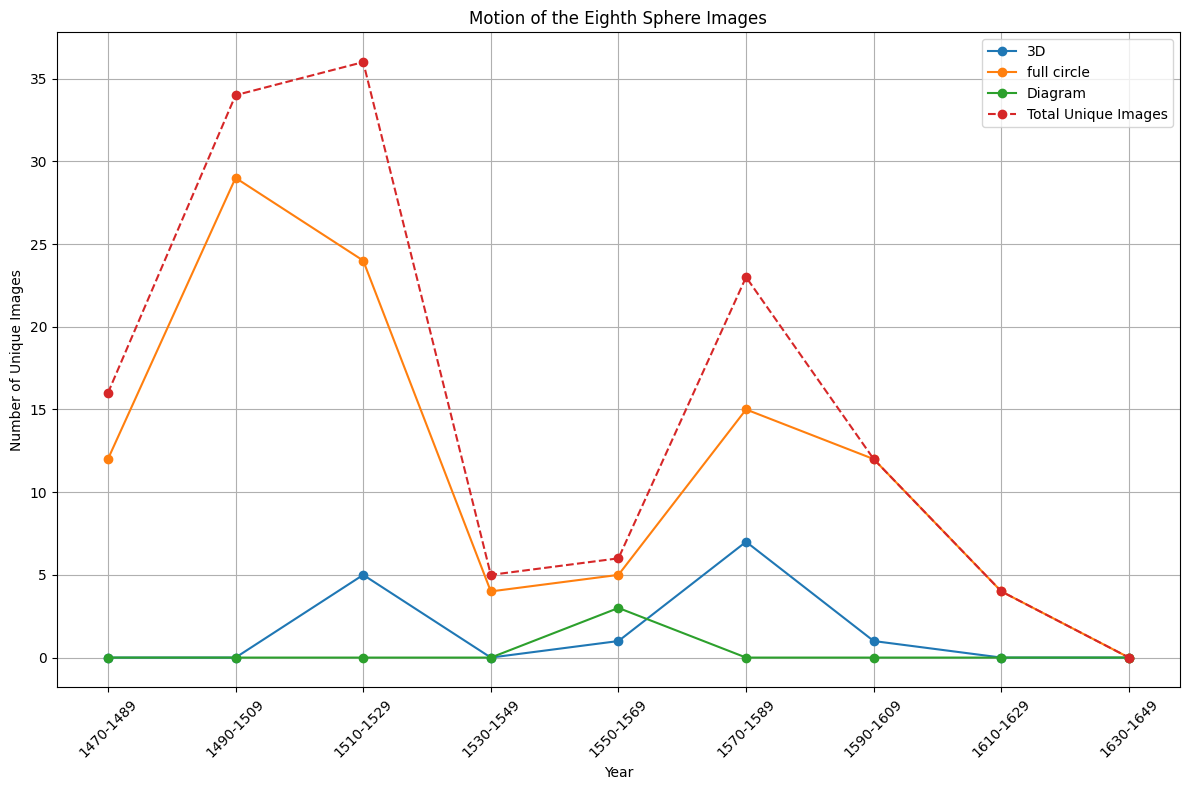

In [23]:
# Define the intervals and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
eighth_sphere_visual['interval'] = pd.cut(eighth_sphere_visual['year'], bins=bins, labels=labels, right=True)

# Define the columns of interest and the specific unique values to plot
columns_of_interest = {
    '2D/3D': '3D',
    'full circle/ Element': 'element',
    'full circle/ Element': 'full circle',
    'specific diagram/ prominent "type"': 'diagram'
}

# Prepare a dictionary to hold the results
results = {}

# Calculate occurrences of the specified unique values for each interval
for column, value in columns_of_interest.items():
    if isinstance(value, list):
        # If value is a list, count occurrences of any of the values in the list
        results[column] = eighth_sphere_visual[eighth_sphere_visual[column].isin(value)].groupby('interval')['images'].nunique()
    else:
        # Otherwise, count occurrences of the single specified value
        results[column] = eighth_sphere_visual[eighth_sphere_visual[column] == value].groupby('interval')['images'].nunique()

# Calculate the total number of unique images per interval
total_unique_images = eighth_sphere_visual.groupby('interval')['images'].nunique()

# Convert the results dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Add the total unique images to the DataFrame
results_df['total_unique_images'] = total_unique_images

# Define labels for the plot
plot_labels = {
    '2D/3D': '3D',
    'full circle/ Element': 'element',
    'full circle/ Element': 'full circle',
    'specific diagram/ prominent "type"': 'Diagram'
}

# Plotting
plt.figure(figsize=(12, 8))

# Plot each column of interest
for column, label in plot_labels.items():
    plt.plot(results_df.index, results_df[column], marker='o', label=label)

# Plot total unique images
plt.plot(results_df.index, results_df['total_unique_images'], marker='o', linestyle='--', label='Total Unique Images')

# Adding titles and labels
plt.title('Motion of the Eighth Sphere Images')
plt.xlabel('Year')
plt.ylabel('Number of Unique Images')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

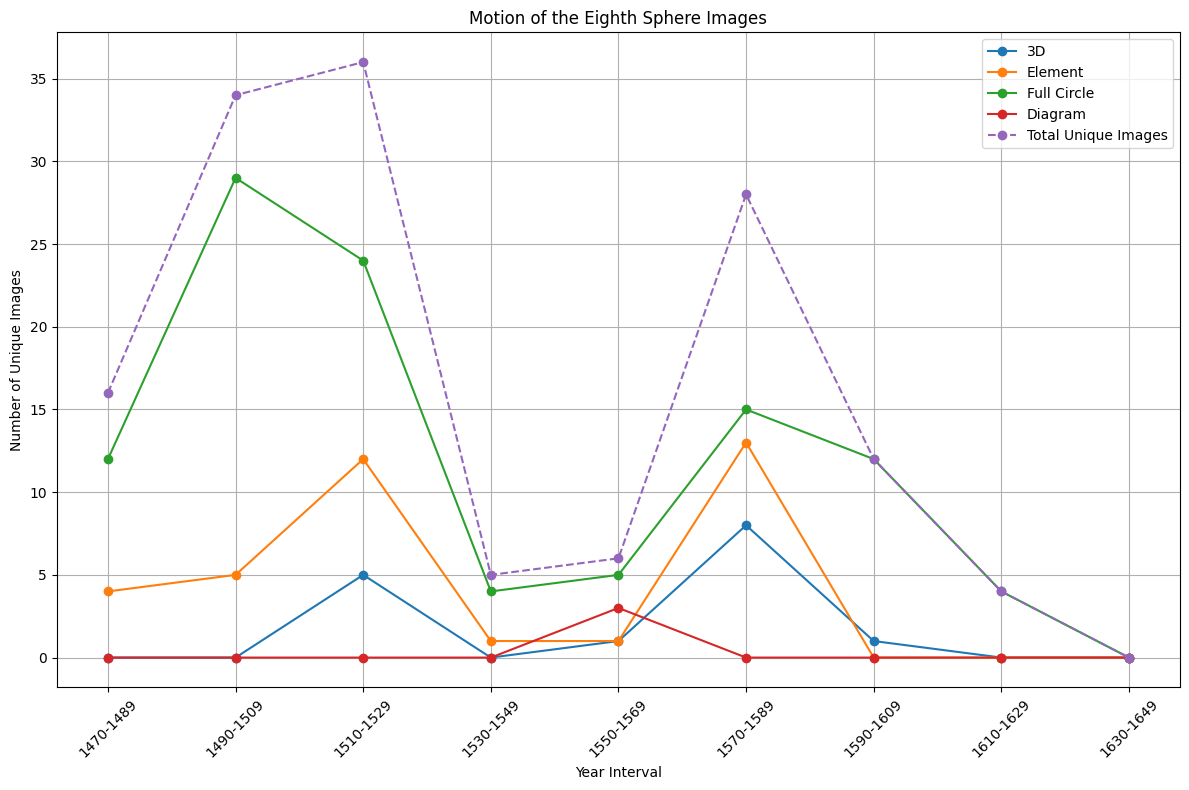

In [28]:
# Define the intervals and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
eighth_sphere_visual['interval'] = pd.cut(eighth_sphere_visual['year'], bins=bins, labels=labels, right=True)

# Define the columns of interest and the specific unique values to plot
columns_of_interest = {
    '2D/3D': '3D',
    'full circle/ Element': ['element', 'full circle'],  # Handle separately
    'specific diagram/ prominent "type"': 'diagram'
}

# Prepare a dictionary to hold the results
results = {}

# Calculate occurrences of the specified unique values for each interval
for column, value in columns_of_interest.items():
    if isinstance(value, list):
        # If value is a list, handle each value separately
        for v in value:
            results[f'{column} - {v}'] = eighth_sphere_visual[eighth_sphere_visual[column] == v].groupby('interval', observed=False).size().reindex(labels, fill_value=0)
    else:
        # Otherwise, count occurrences of the single specified value
        results[column] = eighth_sphere_visual[eighth_sphere_visual[column] == value].groupby('interval', observed=False).size().reindex(labels, fill_value=0)

# Calculate the total number of unique images per interval
total_unique_images = eighth_sphere_visual.groupby('interval', observed=False).size().reindex(labels, fill_value=0)

# Convert the results dictionary to a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Add the total unique images to the DataFrame
results_df['total_unique_images'] = total_unique_images

# Define labels for the plot
plot_labels = {
    '2D/3D': '3D',
    'full circle/ Element - element': 'Element',
    'full circle/ Element - full circle': 'Full Circle',
    'specific diagram/ prominent "type"': 'Diagram'
}

# Plotting
plt.figure(figsize=(12, 8))

# Plot each column of interest
for column, label in plot_labels.items():
    if column in results_df.columns:
        plt.plot(results_df.index, results_df[column], marker='o', label=label)

# Plot total unique images
plt.plot(results_df.index, results_df['total_unique_images'], marker='o', linestyle='--', label='Total Unique Images')

# Adding titles and labels
plt.title('Motion of the Eighth Sphere Images')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_14160\2119080874.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_part_type = eighth_sphere_visual.groupby(['interval', 'part_type'])['images'].nunique().unstack(fill_value=0)


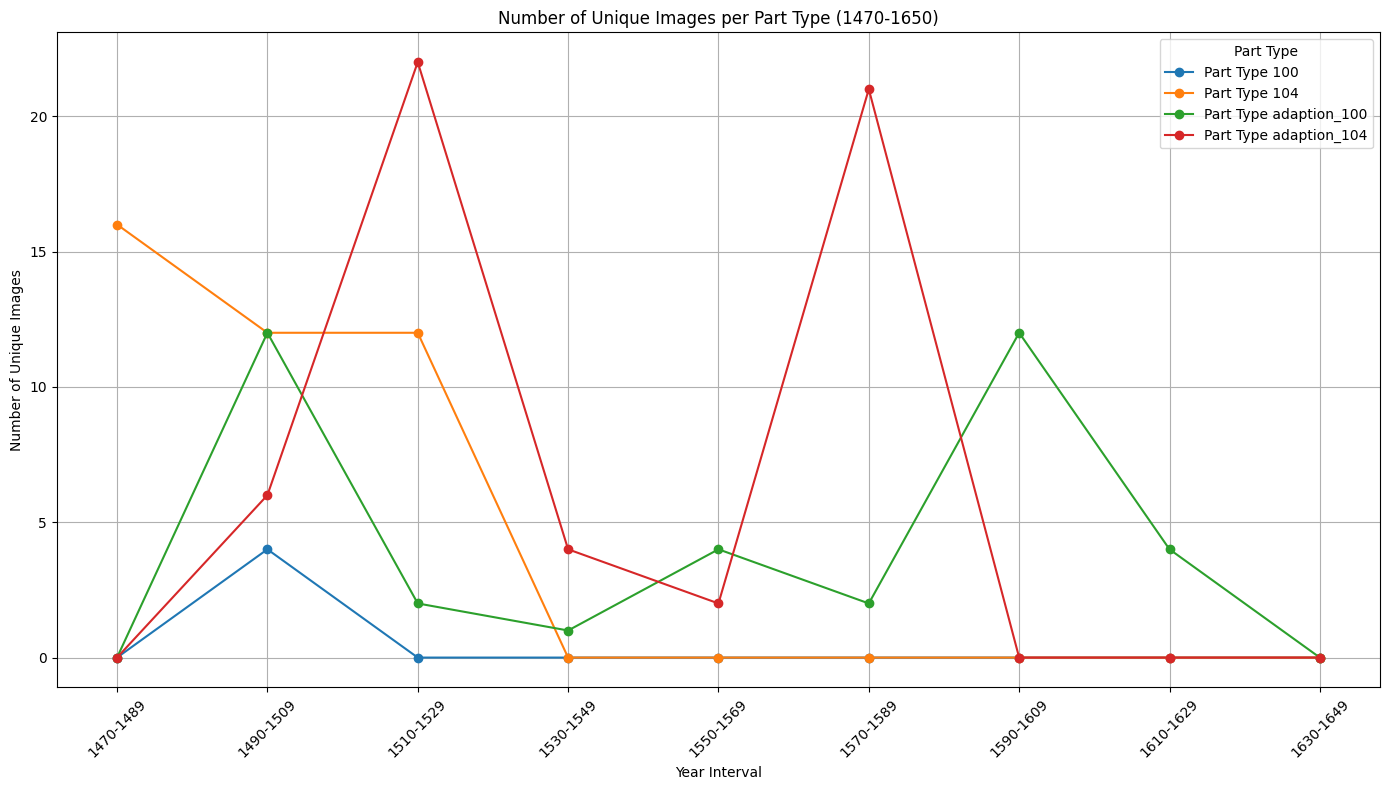

In [29]:
# Define the intervals and labels
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
eighth_sphere_visual['interval'] = pd.cut(eighth_sphere_visual['year'], bins=bins, labels=labels, right=True)

# Group by 'interval' and 'part_type', and calculate the number of unique images
unique_images_per_part_type = eighth_sphere_visual.groupby(['interval', 'part_type'])['images'].nunique().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 8))

# Plot each unique part_type
for part_type in unique_images_per_part_type.columns:
    plt.plot(unique_images_per_part_type.index, unique_images_per_part_type[part_type], marker='o', label=f'Part Type {part_type}')

# Adding titles and labels
plt.title('Number of Unique Images per Part Type (1470-1650)')
plt.xlabel('Year Interval')
plt.ylabel('Number of Unique Images')
plt.legend(title='Part Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
eighth_sphere_3d = eighth_sphere_visual[eighth_sphere_visual['2D/3D'] == "3D"]


In [31]:
eighth_sphere_3d

,images,keywords,cluster_name,authors,publishers,printers,place,year,bid,book,part_or_adaption,pagenum,bb,part_type,year_interval,2D/3D,full circle/ Element,"specific diagram/ prominent ""type""",Unnamed: 4,interval
51,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Motion of the Eighth Sphere;MVK_Diagrams;SK...,SIL_02846,"Pifferi, Francesco;Sacrobosco, Johannes de","Marchetti, Silvestro","Marchetti, Silvestro",Siena,1604,1921,http://sphaera.mpiwg-berlin.mpg.de/id/item/514...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,74,"xywh=237,248,687,687",adaption_100,1590-1609,3D,full circle,NaN,NaN,1590-1609
88,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Motion of the Eighth Sphere;MVK_Diagrams,SIL_02249,"Regiomontanus, Johannes;Schreckenfuchs, Erasmu...","Petri, Heinrich","Petri, Heinrich",Basel,1569,1943,http://sphaera.mpiwg-berlin.mpg.de/id/item/8f0...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,20,"xywh=149,654,656,717",adaption_100,1550-1569,3D,full circle,diagram,NaN,1550-1569
93,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,CK_Motion of the Eighth Sphere;Per_De motu oct...,SIL_02980,"Mazzolini, Silvestro","Ponte, Gottardo da","Ponte, Gottardo da",Milan,1514,2092,http://sphaera.mpiwg-berlin.mpg.de/id/item/ceb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,213,"xywh=223,572,243,245",adaption_104,1510-1529,3D,element,NaN,NaN,1510-1529
94,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Diagrams;Per_De motu octavae sphaerae;CK_M...,SIL_02426,"Mazzolini, Silvestro","Ponte, Gottardo da","Ponte, Gottardo da",Milan,1514,2092,http://sphaera.mpiwg-berlin.mpg.de/id/item/ceb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,213,"xywh=230,809,239,188",adaption_104,1510-1529,3D,full circle,NaN,NaN,1510-1529
95,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;CK_Motion of the ...,SIL_02731,"Mazzolini, Silvestro","Ponte, Gottardo da","Ponte, Gottardo da",Milan,1514,2092,http://sphaera.mpiwg-berlin.mpg.de/id/item/ceb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,214,"xywh=112,1022,310,141",adaption_104,1510-1529,3D,element,NaN,NaN,1510-1529
99,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;Per_De declinatio...,SIL_01044,"Mazzolini, Silvestro","Ponte, Gottardo da","Ponte, Gottardo da",Milan,1514,2092,http://sphaera.mpiwg-berlin.mpg.de/id/item/ceb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,215,"xywh=217,971,384,122",adaption_104,1510-1529,3D,element,NaN,NaN,1510-1529
104,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De motu octavae sphaerae;CK_Motion of the ...,SIL_02808,"Mazzolini, Silvestro","Ponte, Gottardo da","Ponte, Gottardo da",Milan,1514,2092,http://sphaera.mpiwg-berlin.mpg.de/id/item/ceb...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,217,"xywh=217,289,296,236",adaption_104,1510-1529,3D,full circle,NaN,NaN,1510-1529
115,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,MVK_Pictorial_Diagrams;MTK_Motion of the Eight...,SIL_02445,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1583,2190,http://sphaera.mpiwg-berlin.mpg.de/id/item/114...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,162,"xywh=1213,1499,1456,1127",adaption_104,1570-1589,3D,full circle,NaN,NaN,1570-1589
116,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De declinatione et latitudine;CK_Motion of...,SIL_02522,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1583,2190,http://sphaera.mpiwg-berlin.mpg.de/id/item/114...,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,162,"xywh=1226,574,1342,1038",adaption_104,1570-1589,3D,element,NaN,NaN,1570-1589
117,http://devmeta.sphaera.mpiwg-berlin.mpg.de/res...,Per_De declinatione et latitudine;CK_Motion of...,SIL_00161,"Sacrobosco, Johannes de;Peurbach, Georg von;Gi...","Béraud, Symphorien","Béraud, Symphorien",Lyon,1583,2190,http://sphaera.mpiwg-berlin.mpg.de/id/item/114...,http://sphaera.mpiwg-b

In [32]:
unique_printeres = eighth_sphere_3d['printers'].unique()

In [34]:
print(unique_printeres)

['Marchetti, Silvestro' 'Petri, Heinrich' 'Ponte, Gottardo da'
 'Béraud, Symphorien']


In [35]:
unique_places = eighth_sphere_3d['place'].unique()
print(unique_places)

['Siena' 'Basel' 'Milan' 'Lyon']


In [40]:
all_printers = eighth_sphere_visual['printers'].nunique()
print(all_printers)

29


In [41]:
all_places = eighth_sphere_visual['place'].nunique()
print(all_places)

14
